<a href="https://colab.research.google.com/github/Ivyxchang/Mole-Count-Study-Analysis/blob/main/Mole_Count_Study_in_Colorado_Children.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Mole Count Study in Colorado Children**

# Introduction

## Background

Existing researches show that The presence of moles is the strongest predictor of melanoma risk, because both melanoma and moles arise from melanocytes, and in many cases, moles are thought to be intermediate in the pathway from melanocyte to melanoma. Individuals with high numbers of moles have a 6-7 fold increased risk of melanoma. In addition, most moles develop in childhood, and aside from genetic predisposition, sun exposure is the primary determinant of mole prevalence. Therefore, an understanding of the genetic, environmental, and behavioral factors that contribute to mole growth/development in children is essential for understanding the pathways to melanoma.
<br> <br>
The purpose of my analyses is to examine if different demographic backgrounds, genetic characteristics, and behavioral factors will affect the number of moles in children.
<br> <br>
## About the Dataset

This project uses the Mole Count Data 2004-2008 dataset.
<br> <br>
The data includes 472 observations of children in Colorado age 6 followed from baseline to age 10. It has 15 variables including demographic information, genetic information of the observations, and mole counts data across 5 years from 2004 to 2008. 
<br> <br>
The dataset can be found [here](https://raw.githubusercontent.com/Ivyxchang/Mole-Count-Study-Analysis/main/MoleCountData2004-2008.csv).

<br>

***Data Dictionary:***<br>
 

*   **Respondent Code Number:** id number
*   **oca2 status:** 0 = gg, 1 = ga, 2 = aa, 9 = missing
*   **gender:** 1 = Female, 2 = Male
*   **hispanic:** 0 = No, 1 = Yes
*   **molecount2004:** Number of moles in 2004
*   **molecount2005:** Number of moles in 2005
*   **molecount2006:** Number of moles in 2006
*   **molecount2007:** Number of moles in 2007
*   **molecount2008:** Number of moles in 2008
*   **eyecolor:** 1 = blue, green or combo, 2 = light/dark brown, 3 = hazel
*   **baseskincolor:** Skin color based on a continuous score, higher is darker
*   **haircolor:** 1 = blonde, 2 = red, 3 = brown, 4 = black
*   **number vacs birth thru 2005:** Total number of waterside vacations from birth through 2005
*   **number vacs birth thru 2006:** Total number of waterside vacations from birth through 2006
*   **number vacs birth thru 2007:** Total number of waterside vacations from birth through 2007

# Research Questions and Hypotheses


#### **Question 1:** Is there a difference between the mole count for different gender, different ethnicity, different hair color, and different eye color?

**Hypothesis 1**
> $H_0$: There is no statistically significant difference in the mean of the mole count between male and female

> $H_a$: There is a statistically significant difference in the mean of the mole count between male and female

**Hypothesis 2**
> $H_0$:  There is no statistically significant difference in the mean of the mole count between Hispanic and Non-Hispanic groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between Hispanic and Non-Hispanic groups

**Hypothesis 3**
> $H_0$: There is no statistically significant difference in the mean of the mole count between light hair color and dark hair color groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between light hair color and dark hair color groups

**Hypothesis 4**
> $H_0$: There is no statistically significant difference in the mean of the mole count between blue or green eye color and brown or hazel eye color groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between blue or green eye color and brown or hazel eye color groups

**Hypothesis 5**
> $H_0$: There is no statistically significant difference in the mean of the mole count between lighter base skin color and darker base skin color groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between lighter base skin color and darker base skin color groups
<br><br>

#### **Question 2:** Is there a relationship between the base skin color and the mole count, and is there a relationship between the number of vacations taken and the mole count?
**Hypothesis 6**
> $H_0$: There is no correlation between the base skin color and the mole count

> $H_a$: There is some correlation between the base skin color and the mole count

**Hypothesis 7**
> $H_0$: There is no correlation between the number of vacations taken and the mole count

> $H_a$: There is some correlation between the number of vacations taken and the mole count


# Getting to Know the Data



## Initial Setup
First, we will import all libraries we are going to use in this notebook and then load our data.

In [ ]:
# import and alias libraries
import math
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
sns.set()
sns.set_style("white")

import warnings
warnings.filterwarnings('ignore') 

In [ ]:
# import the data from Github
url = 'https://raw.githubusercontent.com/Ivyxchang/Mole-Count-Study-Analysis/main/MoleCountData2004-2008.csv'
mole_df = pd.read_csv(url, encoding='unicode_escape')

In [ ]:
# check the information and the first 5 rows of the dataframe
print('--- info ---')
mole_df.info()
print('\n')
print('--- head ---')
mole_df.head()

--- info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 472 entries, 0 to 471
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent Code Number        472 non-null    int64  
 1   oca2 status                   472 non-null    int64  
 2   gender                        472 non-null    int64  
 3   hispanic                      472 non-null    int64  
 4   molecount2004                 411 non-null    float64
 5   molecount2005                 427 non-null    float64
 6   molecount2006                 438 non-null    float64
 7   molecount2007                 450 non-null    float64
 8   molecount2008                 415 non-null    float64
 9   eyecolor                      472 non-null    int64  
 10  baseskincolor                 472 non-null    float64
 11  haircolor                     471 non-null    float64
 12  number vacs birth thru 2005   472 non-null    int64

,Respondent Code Number,oca2 status,gender,hispanic,molecount2004,molecount2005,molecount2006,molecount2007,molecount2008,eyecolor,baseskincolor,haircolor,number vacs birth thru 2005,number vacs birth thru 2006,number vacs birth thru 2007
0,120,1,1,1,NaN,50.0,35.0,43.0,38.0,2,10.562702,3.0,1,1,1
1,173,0,1,0,7.0,25.0,27.0,22.0,19.0,1,10.644993,3.0,1,1,1
2,221,0,2,0,NaN,NaN,11.0,5.0,1.0,1,7.391360,2.0,1,1,1
3,232,2,1,0,21.0,21.0,25.0,33.0,NaN,2,11.036958,3.0,0,0,0
4,253,1,1,0,8.0,20.0,20.0,46.0,75.0,3,10.881760,3.0,1,1,3


## Explore and Clean the Data

Then, we need to clean the data and have a deeper understanding of it.

### Data Cleaning

First, we take a look at all the columns of our dataset.

In [ ]:
mole_df.columns

Index(['Respondent Code Number', 'oca2 status', 'gender', 'hispanic',
       'molecount2004', 'molecount2005', 'molecount2006', 'molecount2007',
       'molecount2008', 'eyecolor', 'baseskincolor', 'haircolor',
       'number vacs birth thru 2005', 'number vacs  birth thru 2006',
       'number vacs  birth thru 2007'],
      dtype='object')

This analysis is not going to focus on the genotype and the longitudinal study of mole development over years, and it will use the data from the most recent year. Therefore the below columns can be excluded:<br>

>> **ID**
 *   Respondent Code Number

>> **Genotype**
 *  oca2 status

>> **Earlier years**
 *  molecount 2004
 *  molecount 2005
 *  molecount 2006
 *  molecount 2007
 *  number vacs birth thru 2005
 *  number vacs birth thru 2006







Now, we generate a DataFrame with only the columns we need for this analysis.



In [ ]:
# keep the columns we need for this analysis
mole_df = mole_df.loc[:, ['gender', 'hispanic', 'molecount2008', 'eyecolor', 'baseskincolor', 'haircolor','number vacs  birth thru 2007']]

#check out what the new dataframe look like
mole_df.head()

,gender,hispanic,molecount2008,eyecolor,baseskincolor,haircolor,number vacs birth thru 2007
0,1,1,38.0,2,10.562702,3.0,1
1,1,0,19.0,1,10.644993,3.0,1
2,2,0,1.0,1,7.391360,2.0,1
3,1,0,NaN,2,11.036958,3.0,0
4,1,0,75.0,3,10.881760,3.0,3


And then, we check where the nulls are and make a decision on if we want to drop the nulls for our analysis.

In [ ]:
# checking for rows with a null in any column
null_rows = mole_df[mole_df.isnull().any(axis=1)] 
print("There are {} rows with a null out of {} rows in the dataset".format(len(null_rows),len(mole_df)))

There are 58 rows with a null out of 472 rows in the dataset


In [ ]:
# checking for nulls
mole_df.isnull().sum()

gender                           0
hispanic                         0
molecount2008                   57
eyecolor                         0
baseskincolor                    0
haircolor                        1
number vacs  birth thru 2007     0
dtype: int64

There are 57 null values in the **molecount2008** column and 1 null value in the **haircolor** column. Filling the null values won't help with our analysis, so we should drop the rows with the null values.

In [ ]:
# drop the null values
print("The starting size of mole_df is {}".format(len(mole_df)))
clean_mole_df = mole_df.dropna()
print("The size of the cleaned dataframe is {}".format(len(clean_mole_df)))

The starting size of mole_df is 472
The size of the cleaned dataframe is 414


Here, we examine the information and the first 5 rows of the cleaned data again before we move on to the next step.

In [ ]:
# check the information and first 5 rows of the cleaned dataframe
clean_mole_df.info()
clean_mole_df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414 entries, 0 to 470
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gender                        414 non-null    int64  
 1   hispanic                      414 non-null    int64  
 2   molecount2008                 414 non-null    float64
 3   eyecolor                      414 non-null    int64  
 4   baseskincolor                 414 non-null    float64
 5   haircolor                     414 non-null    float64
 6   number vacs  birth thru 2007  414 non-null    int64  
dtypes: float64(3), int64(4)
memory usage: 25.9 KB


,gender,hispanic,molecount2008,eyecolor,baseskincolor,haircolor,number vacs birth thru 2007
0,1,1,38.0,2,10.562702,3.0,1
1,1,0,19.0,1,10.644993,3.0,1
2,2,0,1.0,1,7.391360,2.0,1
4,1,0,75.0,3,10.881760,3.0,3
5,2,0,59.0,3,9.604847,1.0,2


Now, our data look clean and ready for a deeper look.

### Data Exploration

Let's take a look at how the 2008 mole count is destributed.

count    414.000000
mean      50.833333
std       30.152618
min        1.000000
25%       30.000000
50%       45.000000
75%       65.000000
max      187.000000
Name: molecount2008, dtype: float64


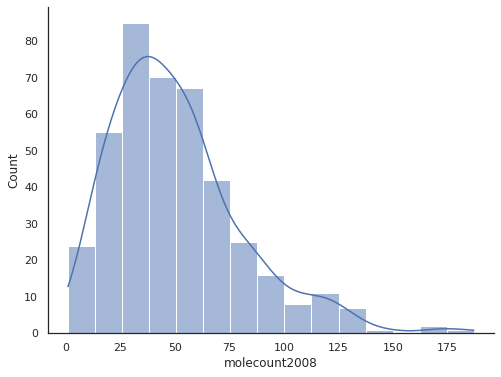

In [ ]:
print(clean_mole_df['molecount2008'].describe())
plt.figure(figsize = (8,6))
ax = sns.histplot(clean_mole_df['molecount2008'], bins = 15, kde = True)
sns.despine()

We can see a bell curve from the histogram, and the 2008 mole count is right skewed.

Next, let's take a look at how the 2008 mole count is distributed across different demographic backgrounds and genetic characteristics.



*   Hispanic vs. Non-Hispanic



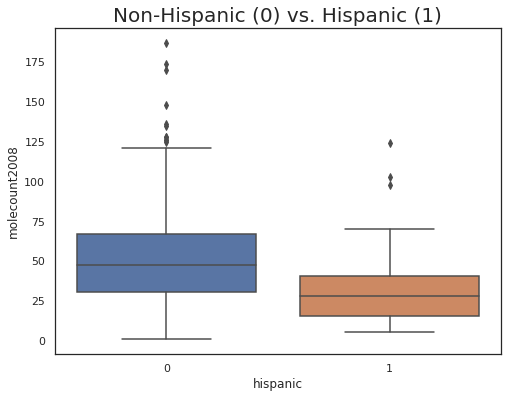

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Non-Hispanic (0) vs. Hispanic (1)', fontdict = {'fontsize' : 20} )
sns.boxplot(y = clean_mole_df['molecount2008'], x = clean_mole_df['hispanic']);



*   Female vs. Male



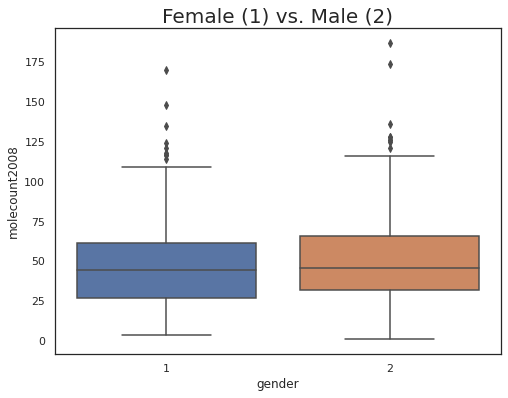

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Female (1) vs. Male (2)', fontdict = {'fontsize' : 20} )
sns.boxplot(y = clean_mole_df['molecount2008'], x = clean_mole_df['gender']);



*   Different Hair Colors

>> 1 = Blonde <br> 2 = Red <br>3 = Brown <br>4 = Black





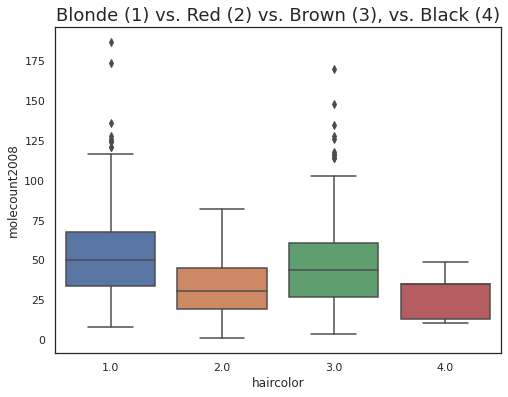

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Blonde (1) vs. Red (2) vs. Brown (3), vs. Black (4)', fontdict = {'fontsize' : 18} )
sns.boxplot(y = clean_mole_df['molecount2008'], x = clean_mole_df['haircolor']);

To answer our research quesiton, we want to group hair color into two categories - light color and dark color.

Here, we will consider blonde and red hair to be light colors, brown and black hair to be dark colors.

In [ ]:
# create a list of our conditions
haircolor_conditions = [(clean_mole_df['haircolor'] == 1) | (clean_mole_df['haircolor'] == 2), (clean_mole_df['haircolor'] == 3) | (clean_mole_df['haircolor'] == 4)]

# create a list of the values we want to assign for each condition
haircolor_values = ['Light', 'Dark']

# create a new column and use np.select to assign values to it using our lists as arguments
clean_mole_df['Hair Color'] = np.select(haircolor_conditions, haircolor_values)

# display updated DataFrame
clean_mole_df.head()

,gender,hispanic,molecount2008,eyecolor,baseskincolor,haircolor,number vacs birth thru 2007,Hair Color
0,1,1,38.0,2,10.562702,3.0,1,Dark
1,1,0,19.0,1,10.644993,3.0,1,Dark
2,2,0,1.0,1,7.391360,2.0,1,Light
4,1,0,75.0,3,10.881760,3.0,3,Dark
5,2,0,59.0,3,9.604847,1.0,2,Light


Display the boxplot to check how the 2008 mole count is distributed across the two categories:

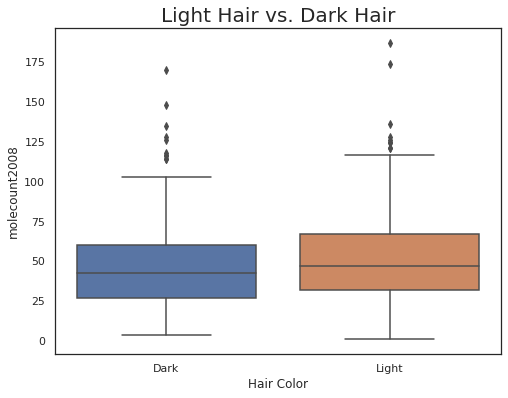

In [ ]:
# display the boxplot to check how the 2008 mole count is distributed across the two categories 
plt.figure(figsize=(8,6))
plt.title('Light Hair vs. Dark Hair', fontdict = {'fontsize' : 20} )
sns.boxplot(y = clean_mole_df['molecount2008'], x = clean_mole_df['Hair Color']);

 
*   Different Eye Colors

> 1 = blue, green or combo <br>2 = light/dark brown <br> 3 = hazel





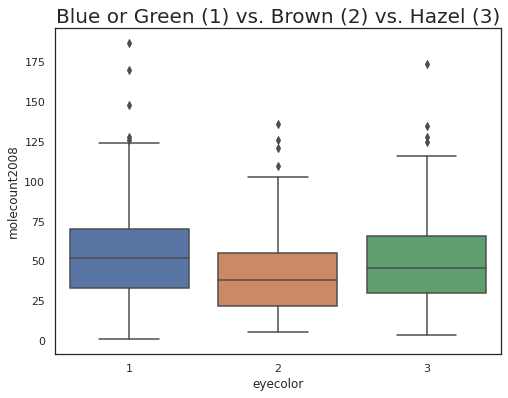

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Blue or Green (1) vs. Brown (2) vs. Hazel (3)', fontdict = {'fontsize' : 20} )
sns.boxplot(y = clean_mole_df['molecount2008'], x = clean_mole_df['eyecolor']);

To answer our research quesiton, we want to group eye color into two categories - blue or green color and brown or hazel color.

In [ ]:
# create a list of our conditions
eyecolor_conditions = [(clean_mole_df['eyecolor'] == 1) | (clean_mole_df['eyecolor'] == 2), (clean_mole_df['eyecolor'] == 3)]

# create a list of the values we want to assign for each condition
eyecolor_values = ['Blue or Green', 'Brown or Hazel']

# create a new column and use np.select to assign values to it using our lists as arguments
clean_mole_df['Eye Color'] = np.select(eyecolor_conditions, eyecolor_values)

# display updated DataFrame
clean_mole_df.head()

,gender,hispanic,molecount2008,eyecolor,baseskincolor,haircolor,number vacs birth thru 2007,Hair Color,Eye Color
0,1,1,38.0,2,10.562702,3.0,1,Dark,Blue or Green
1,1,0,19.0,1,10.644993,3.0,1,Dark,Blue or Green
2,2,0,1.0,1,7.391360,2.0,1,Light,Blue or Green
4,1,0,75.0,3,10.881760,3.0,3,Dark,Brown or Hazel
5,2,0,59.0,3,9.604847,1.0,2,Light,Brown or Hazel


Display the boxplot to check how the 2008 mole count is distributed across the two categories:

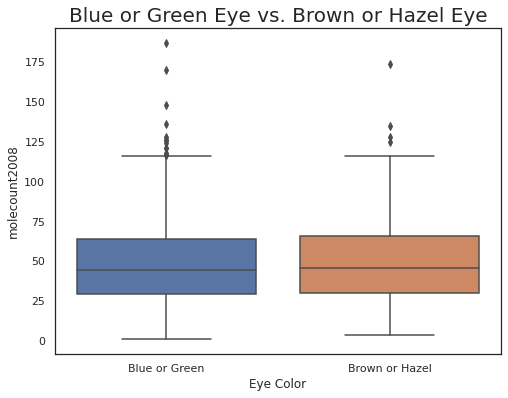

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Blue or Green Eye vs. Brown or Hazel Eye', fontdict = {'fontsize' : 20} )
sns.boxplot(y = clean_mole_df['molecount2008'], x = clean_mole_df['Eye Color']);



*   Base Skin Color
> The base skin color (baseskincolor) column in our dataset is continuous numeric data. Let's take a look at how it is distributed.





count    414.000000
mean      10.712976
std        1.644759
min        5.828434
25%        9.469548
50%       10.839646
75%       12.039863
max       14.033928
Name: baseskincolor, dtype: float64


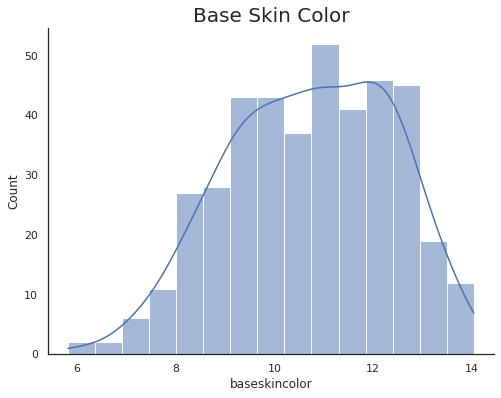

In [ ]:
print(clean_mole_df['baseskincolor'].describe())
plt.figure(figsize=(8,6))
plt.title('Base Skin Color', fontdict = {'fontsize' : 20} )
ax = sns.histplot(clean_mole_df['baseskincolor'], bins = 15, kde = True)
sns.despine()

To answer our research quesiton, we want to divide the skin color into two categories - lighter color and darker color.

We will use the mean as a divider, base skin color under the mean is considered to be lighter color, and base skin color above the mean is considered to be darker color.


In [ ]:
skincolor_conditions = [(clean_mole_df['baseskincolor'] < clean_mole_df['baseskincolor'].mean()), (clean_mole_df['baseskincolor'] >= clean_mole_df['baseskincolor'].mean())]

# create a list of the values we want to assign for each condition
skincolor_values = ['Lighter', 'Darker']

# create a new column and use np.select to assign values to it using our lists as arguments
clean_mole_df['Base Skin Color'] = np.select(skincolor_conditions, skincolor_values)

# display updated DataFrame
clean_mole_df.head()

,gender,hispanic,molecount2008,eyecolor,baseskincolor,haircolor,number vacs birth thru 2007,Hair Color,Eye Color,Base Skin Color
0,1,1,38.0,2,10.562702,3.0,1,Dark,Blue or Green,Lighter
1,1,0,19.0,1,10.644993,3.0,1,Dark,Blue or Green,Lighter
2,2,0,1.0,1,7.391360,2.0,1,Light,Blue or Green,Lighter
4,1,0,75.0,3,10.881760,3.0,3,Dark,Brown or Hazel,Darker
5,2,0,59.0,3,9.604847,1.0,2,Light,Brown or Hazel,Lighter


Display the boxplot to check how the 2008 mole count is distributed across the two categories:

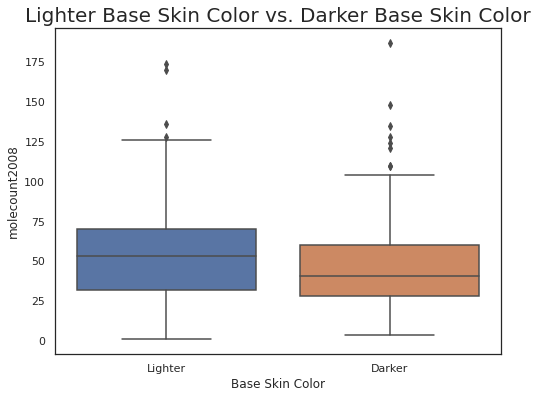

In [ ]:
plt.figure(figsize=(8,6))
plt.title('Lighter Base Skin Color vs. Darker Base Skin Color', fontdict = {'fontsize' : 20} )
sns.boxplot(y = clean_mole_df['molecount2008'], x = clean_mole_df['Base Skin Color']);

Last, let's take a look at the correlation of our data:

[Text(0.5, 0, 'gender'),
 Text(1.5, 0, 'hispanic'),
 Text(2.5, 0, 'molecount2008'),
 Text(3.5, 0, 'eyecolor'),
 Text(4.5, 0, 'baseskincolor'),
 Text(5.5, 0, 'haircolor'),
 Text(6.5, 0, 'number vacs  birth thru 2007')]

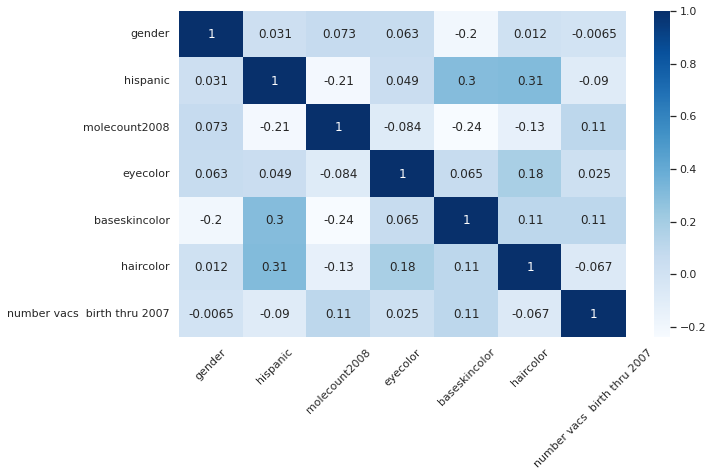

In [ ]:
# set up the plot size
plt.figure(figsize = (10,6))

# plot the correlation heatmap
correlation = sns.heatmap(clean_mole_df.corr(), cmap='Blues', annot=True)

# rotating the labels for the ease of reading 
correlation.set_xticklabels(correlation.get_xticklabels(),rotation=45)

As can be seen from the correlation heat map above, we don't see strong correlations between any two variables in our data. To answer our research question, we need to run Pearson's Correlation Coefficient tests to see if the base skin color and the number of vacations taken have a relationship with the mole count.

# Analysis of the Research Questions



## Testing the Hypotheses for Question 1
**Is there a difference between the mole count for different gender, different ethnicity, different hair color, and different eye color?**


### Creating bins

First we will create bins for different demographic and genetic groups. Then we will check the number of records in each bin to see if there's enough data to run the t-test.

In [ ]:
# gender
female = clean_mole_df.loc[clean_mole_df['gender'] == 1]
male = clean_mole_df.loc[clean_mole_df['gender'] == 2]

# ethnicity 
# 1 = Hispanic 
# 2 = non-Hispanic
nonhispanic = clean_mole_df.loc[clean_mole_df['hispanic'] == 0]
hispanic = clean_mole_df.loc[clean_mole_df['hispanic'] == 1]

# hair color
# 1 = blonde
# 2 = red
# 3 = brown
# 4 = black
lighthair = clean_mole_df.loc[((clean_mole_df['haircolor'] == 1) | (clean_mole_df['haircolor'] == 2))]                                       
darkhair = clean_mole_df.loc[((clean_mole_df['haircolor'] == 3) | (clean_mole_df['haircolor'] == 4))]       

# eye color
# 1 = blue, green or combom
# 2 = light/dark brown
# 3 = hazel 
bluegreeneye = clean_mole_df.loc[clean_mole_df['eyecolor'] == 1] 
brownhazeleye = clean_mole_df.loc[((clean_mole_df['eyecolor'] == 2) | (clean_mole_df['eyecolor'] == 3))]    

# base skin color
# Skin color based on a continuous score, higher is darker
lighterskin = clean_mole_df[clean_mole_df['baseskincolor']< clean_mole_df['baseskincolor'].mean()]
darkerskin = clean_mole_df[clean_mole_df['baseskincolor'] >= clean_mole_df['baseskincolor'].mean()]


# checking the number of records
female_n = female['gender'].count()
male_n = female['gender'].count()
nonhispanic_n = nonhispanic['gender'].count()
hispanic_n = hispanic['gender'].count()
lighthair_n = lighthair['gender'].count()
darkhair_n = darkhair['gender'].count()
bluegreeneye_n = bluegreeneye['gender'].count()
brownhazeleye_n = brownhazeleye['gender'].count()
lighterskin_n = lighterskin['gender'].count()
darkerskin_n = darkerskin['gender'].count()

print('Number of records of female = {}.'.format(female_n))
print('Number of records of male = {}.'.format(male_n))
print('Number of records of non-Hispanic = {}.'.format(nonhispanic_n))
print('Number of records of Hispanic = {}.'.format(hispanic_n))
print('Number of records of light hair = {}.'.format(lighthair_n))
print('Number of records of dark hair = {}.'.format(darkhair_n))
print('Number of records of blue or green eye color = {}.'.format(bluegreeneye_n))
print('Number of records of brown or hazel eye color = {}.'.format(brownhazeleye_n))
print('Number of records of lighter skin = {}.'.format(lighterskin_n))
print('Number of records of darker skin = {}.'.format(darkerskin_n))



Number of records of female = 224.
Number of records of male = 224.
Number of records of non-Hispanic = 364.
Number of records of Hispanic = 50.
Number of records of light hair = 224.
Number of records of dark hair = 190.
Number of records of blue or green eye color = 188.
Number of records of brown or hazel eye color = 226.
Number of records of lighter skin = 198.
Number of records of darker skin = 216.


All the bins has more than 30 records, we can do t-tests.

### Testing

***Testing Hypothesis 1: Male vs. Female***
> $H_0$: There is no statistically significant difference in the mean of the mole count between male and female

> $H_a$: There is a statistically significant difference in the mean of the mole count between male and female

In [ ]:
# run the t-test
stats.ttest_ind(male['molecount2008'], female['molecount2008'])

Ttest_indResult(statistic=1.4893852404803385, pvalue=0.13715103022597452)

The test result shows a p-value of 0.13715103022597452 which is greater than the alpha of 0.05. Therefore, we **fail to reject the null**.

It means with a 95% confidence there **NO statistically significant difference** in the mean of the mole count between male and female. 

This is telling us that is very unlikely to observe a difference in the number of moles between boys and girls.

**Testing Hypothesis 2: Hispanic vs. Non-Hispanic**
> $H_0$:  There is no statistically significant difference in the mean of the mole count between Hispanic and Non-Hispanic groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between Hispanic and Non-Hispanic groups



In [ ]:
# run the t-test
stats.ttest_ind(hispanic['molecount2008'], nonhispanic['molecount2008'])

Ttest_indResult(statistic=-4.463934787231466, pvalue=1.0401046671474124e-05)

The test result shows a p-value of 1.0401046671474124e-05 which is less than the alpha of 0.05. Therefore, we can **reject the null**.

It means with a 95% confidence there **is a statistically significant difference** in the mean of the mole count between Hispanic and Non-Hispanic groups. 

This is telling us that it is very likely to observe a difference in the number of moles between Hispanic and Non-Hispanic children. Non-Hispanic children are very likely to have more moles.

**Testing Hypothesis 3: Lighthair vs. Darkhair**
> $H_0$: There is no statistically significant difference in the mean of the mole count between light hair color and dark hair color groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between light hair color and dark hair color groups

In [ ]:
# run the t-test
stats.ttest_ind(lighthair['molecount2008'], darkhair['molecount2008'])

Ttest_indResult(statistic=1.7818917822431743, pvalue=0.07550330806948502)

The test result shows a p-value of 0.07550330806948502 which is greater than the alpha of 0.05. Therefore, we **fail to reject the null**.

It means with a 95% confidence there **NO statistically significant difference** in the mean of the mole count between light hair and dark hair groups. 

This is telling us that it is very unlikely to observe a difference in the number of moles between children with light hair and children with dark hair.

**Testing Hypothesis 4: Blue or Green Eye vs. Brown or Hazel Eye**
> $H_0$: There is no statistically significant difference in the mean of the mole count between blue or green eye color and brown or hazel eye color groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between blue or green eye color and brown or hazel eye color groups

In [ ]:
# run the t-test
stats.ttest_ind(bluegreeneye['molecount2008'], brownhazeleye['molecount2008'])

Ttest_indResult(statistic=2.971955539096446, pvalue=0.003132578990205146)

The test result shows a p-value of 0.003132578990205146 which is less than the alpha of 0.05. Therefore, we can **reject the null**.

It means with a 95% confidence there **is a statistically significant difference** in the mean of the mole count between blue or green eye and brown or hazel eye groups.

This is telling us that it is very likely to observe a difference in the number of moles between children with blue or green eyes and children with brown or hazel eyes. Children with blue or green eyes are very likely to have more moles.

**Testing Hypothesis 5: Lighter Base Skin vs. Darker Base Skin**
> $H_0$: There is no statistically significant difference in the mean of the mole count between lighter base skin color and darker base skin color groups

> $H_a$: There is a statistically significant difference in the mean of the mole count between lighter base skin color and darker base skin color groups

In [ ]:
# run the t-test
stats.ttest_ind(lighterskin['molecount2008'], darkerskin['molecount2008'])

Ttest_indResult(statistic=3.251066974002614, pvalue=0.0012442142500233677)

The test result shows a p-value of 0.0012442142500233677 which is less than the alpha of 0.05. Therefore, we can **reject the null**.

It means with a 95% confidence there **is a statistically significant difference** in the mean of the mole count between lighter base skin color and darker base skin color groups.

This is telling us that it is very likely to observe a difference in the number of moles between children with lighter base skin color and children with darker base skin color. Children with lighter base skin color are very likely to have more moles.

## Testing the Hypotheses for Question 2
**Is there a relationship between the base skin color and the mole count, and is there a relationship between the number of vacations taken and the mole count?**

**Testing Hypothesis 6: Base Skin Color & Mole Count**
> $H_0$: There is no correlation between the base skin color and the mole count

> $H_a$: There is some correlation between the base skin color and the mole count

First, we use a scatter plot to visualize the potential correlation:

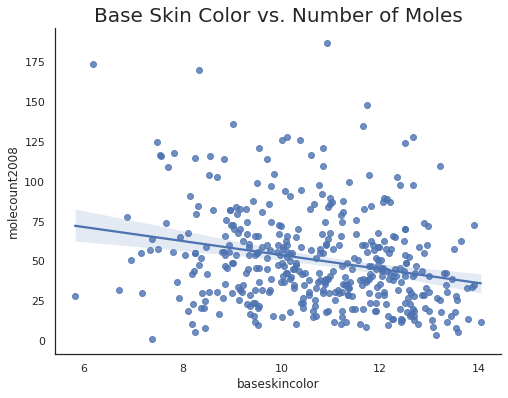

In [ ]:
# display a scatter plot to visualize the correlation
plt.figure(figsize=(8,6))
plt.title('Base Skin Color vs. Number of Moles', fontdict = {'fontsize' : 20} )
sns.regplot(x='baseskincolor', y='molecount2008', data= clean_mole_df)
sns.despine()

Since the scatter plot does not show an obvious correlation between the base skin color and mole count, Pearson’s Correlation Coefficient test will be used to further examine the hypothesis:

In [ ]:
# run the person r test
stats.pearsonr(clean_mole_df['baseskincolor'],clean_mole_df['molecount2008'])

(-0.23999390727705466, 7.78102625749745e-07)

We can see that the r value is -0.23999390727705466 which suggests a weak negative correlation, but the p-value is 7.78102625749745e-07 which is less than the alpha of 0.05. Therefore, we can **reject the null**.

We can conclude that there **is a statistically significant relationship** between the base skin color and mole count for children. The darker the children’s base skin color the fewer moles they have.

**Testing Hypothesis 7: Number of Vacations Taken & Mole Count**
> $H_0$: There is no correlation between the number of vacations taken and the mole count

> $H_a$: There is some correlation between the number of vacations taken and the mole count

First, we use a scatter plot to visualize the potential correlation:

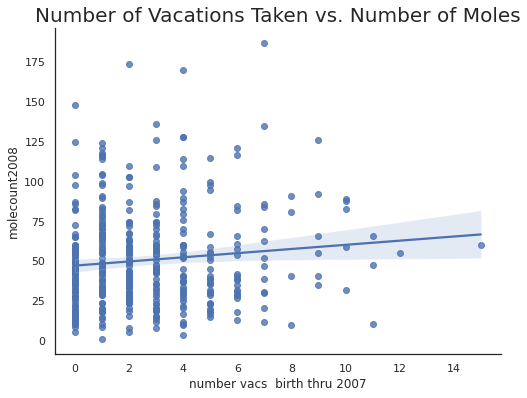

In [ ]:
# display a scatter plot to visualize the correlation
plt.figure(figsize=(8,6))
plt.title('Number of Vacations Taken vs. Number of Moles', fontdict = {'fontsize' : 20} )
sns.regplot(x='number vacs  birth thru 2007', y='molecount2008', data= clean_mole_df)
sns.despine()

Again, the scatter plot does not show an obvious correlation between number of vacations taken and mole count, Pearson’s Correlation Coefficient test will be used to further examine the hypothesis:

In [ ]:
# run the person r test
stats.pearsonr(clean_mole_df['number vacs  birth thru 2007'],clean_mole_df['molecount2008'])

(0.10859041411504917, 0.02715068383576409)

We can see that the p-value is 0.02715068383576409 which is less than the alpha of 0.05. Therefore, we can **reject the null**.

We can conclude that there **is a statistically significant relationship** between the number of vacations children take and their mole count. The more vacations the children take the more moles they have.

The r value here is 0.10859041411504917, it suggests a weak positive correlation between the number of vacations taken and the mole count. Since we don’t have detailed data about the destination of the vacations and the sun protection behavior of the participant, it is understandable that we don’t see a strong correlation between the number of vacations taken and the mole count here. But with the result of our test, we can confirm that the correlation is significant.

# Summary and Next Steps

### **With our analyses of the mole count in Colorado Children we can make the following conclusions:**

There **is a** statistically significant difference in the mean of mole count between:
> * Hispanic and Non-Hispanic children 
> * Children with blue or green eyes and children with brown or hazel eyes
> * Children with lighter base skin color and children with darker base skin color

> In other words, Non-Hispanic children, children with blue or green eyes, and children with lighter base skin color are more likely to have more moles.


There **is no** statistically significant difference in the mean of mole count between:
> * Boys and Girls
> * Children with light hair and children with dark Hair

There **is a** relationship between mole count and:
> * Base Skin Color (negative)
> * Number of Vacations Taken (positive)

> The darker the children’s base skin color is the fewer moles they have, and the more vacations the children take the more moles they have.




### **Next steps and recommendations:**

* Research shows that the number of moles is related to sun exposure and our analysis found the significance in the relationship. However, the correlation we’ve seen from this analysis is not strong. Therefore, in order to find more evidence that supports the relationship between the number of vacations taken and the mole count. We might want to collect more data to study sun exposure during vacations, such as vacation destinations, type of event, hours of exposure, protection efforts taken, and so forth.

* Our dataset includes data on genotype and the data that will support the longitudinal study of mole development over years. This project did not cover these aspects. In the future, we can surely do some further analyses on these subjects. Understanding mole development over time will aid the understanding of the complicated relationship between mole development and melanoma.


* The CDC and parents of young children may find this research useful. Knowing whether the demographic backgrounds and genetic characteristics play the role in children’s mole development and the impact of the number of vacations taken on the number of moles can be helpful for parents to understand their children’s risk of getting melanoma. It will be helpful for CDC to advise the general public in taking prevention efforts such as reducing sun exposure and taking preventional skin cancer screening.

<br>
<br>

This is the end of the Notebook. Thanks for your interest! : )

<br>
<br>
